In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [4]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split

In [12]:
from sklearn.datasets import load_breast_cancer
bc=load_breast_cancer()
bc.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [13]:
bc.target_names

array(['malignant', 'benign'], dtype='<U9')

In [17]:
x=bc['data'][:,0:1]
y=bc['target']

In [18]:
x

array([[17.99 ],
       [20.57 ],
       [19.69 ],
       [11.42 ],
       [20.29 ],
       [12.45 ],
       [18.25 ],
       [13.71 ],
       [13.   ],
       [12.46 ],
       [16.02 ],
       [15.78 ],
       [19.17 ],
       [15.85 ],
       [13.73 ],
       [14.54 ],
       [14.68 ],
       [16.13 ],
       [19.81 ],
       [13.54 ],
       [13.08 ],
       [ 9.504],
       [15.34 ],
       [21.16 ],
       [16.65 ],
       [17.14 ],
       [14.58 ],
       [18.61 ],
       [15.3  ],
       [17.57 ],
       [18.63 ],
       [11.84 ],
       [17.02 ],
       [19.27 ],
       [16.13 ],
       [16.74 ],
       [14.25 ],
       [13.03 ],
       [14.99 ],
       [13.48 ],
       [13.44 ],
       [10.95 ],
       [19.07 ],
       [13.28 ],
       [13.17 ],
       [18.65 ],
       [ 8.196],
       [13.17 ],
       [12.05 ],
       [13.49 ],
       [11.76 ],
       [13.64 ],
       [11.94 ],
       [18.22 ],
       [15.1  ],
       [11.52 ],
       [19.21 ],
       [14.71 ],
       [13.05 

In [19]:
X_train, X_test, y_train, y_test = train_test_split(x, y)

In [20]:
model = LogisticRegression().fit(x,y)
y_score = model.fit(X_train, y_train).decision_function(X_test)
y_pred = model.fit(X_train, y_train).predict(X_test)

C:\Users\hyunk\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hyunk\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hyunk\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [21]:
# calculate AUC
roc_auc = roc_auc_score(y_test, y_score)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_score)

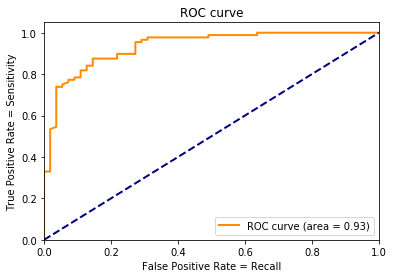

In [22]:
plt.figure()
plt.plot(fpr, tpr, lw=2, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate = Recall')
plt.ylabel('True Positive Rate = Sensitivity')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()
#이게 맞는걸까 과연ㅜ

In [23]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [24]:
kfold = KFold(n_splits=5, shuffle=True, random_state=0)

In [25]:
scores = cross_val_score(LogisticRegression(), x, y, cv=kfold)  # cross_val_score(모델, 데이터, 타깃)
scores 

C:\Users\hyunk\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hyunk\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hyunk\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hyunk\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hyunk\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

array([0.88596491, 0.90350877, 0.84210526, 0.88596491, 0.89380531])

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [34]:
parameters = {'penalty':['l1','l2'], 'C':[0.001,0.009,0.01,0.09,1,5,10]}

In [35]:
grid_dtree = GridSearchCV(LogisticRegression(), param_grid = parameters, cv = 5, refit = True)

In [36]:
grid_dtree.fit(X_train, y_train)

C:\Users\hyunk\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hyunk\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hyunk\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hyunk\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hyunk\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\Users\hyunk\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hyunk\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hyunk\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hyunk\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hyunk\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.009, 0.01, 0.09, 1, 5, 10],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [37]:
scores_df = pd.DataFrame(grid_dtree.cv_results_)

In [38]:
scores_df[['params', 'mean_test_score','rank_test_score','split0_test_score','split1_test_score','split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'C': 0.001, 'penalty': 'l1'}",0.368545,14,0.372093,0.372093,0.364706
1,"{'C': 0.001, 'penalty': 'l2'}",0.631455,9,0.627907,0.627907,0.635294
2,"{'C': 0.009, 'penalty': 'l1'}",0.631455,9,0.627907,0.627907,0.635294
3,"{'C': 0.009, 'penalty': 'l2'}",0.631455,9,0.627907,0.627907,0.635294
4,"{'C': 0.01, 'penalty': 'l1'}",0.631455,9,0.627907,0.627907,0.635294
5,"{'C': 0.01, 'penalty': 'l2'}",0.631455,9,0.627907,0.627907,0.635294
6,"{'C': 0.09, 'penalty': 'l1'}",0.868545,7,0.802326,0.941860,0.835294
7,"{'C': 0.09, 'penalty': 'l2'}",0.852113,8,0.767442,0.918605,0.835294
8,"{'C': 1, 'penalty': 'l1'}",0.887324,2,0.848837,0.930233,0.858824
9,"{'C': 1, 'penalty': 'l2'}",0.887324,2,0.813953,0.953488,0.870588


In [39]:
print('GridSearchCV 최적 파라미터: ', grid_dtree.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dtree.best_score_))

GridSearchCV 최적 파라미터:  {'C': 5, 'penalty': 'l2'}
GridSearchCV 최고 정확도: 0.8967
